<a href="https://colab.research.google.com/github/afortuny/DeepLearningFastAI/blob/main/RunningShoeAPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Which running shoe brand are you wearing?

The following simple app uses computer vision to predict if your show belongs to adidas, nike or puma. 
Please upload only shoes of those brands.

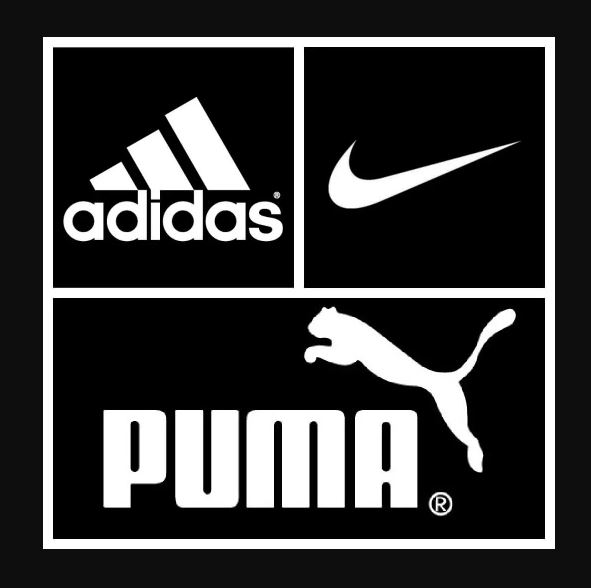

In [9]:
from IPython.display import Image
Image(filename="/content/Brands.JPG")

In [ ]:
#!pip install fastai
#!pip install voila
!jupyter serverextension enable --sys-prefix voila
#!pip install packaging
#!pip install pillow
import urllib.request

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
      voila  OK


In [ ]:
#!pip install ipywidgets

In [ ]:
import ipywidgets as widgets
from fastai.vision.all import *
from fastai.vision.widgets import * 

In [ ]:
learn_inf = load_learner('export.pkl')
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()


In [ ]:
def on_data_change(change):
    lbl_pred.value = ''
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'


In [ ]:
btn_upload.observe(on_data_change, names=['data'])


In [ ]:
display(VBox([widgets.Label('Upload your running shoe!'), btn_upload, out_pl, lbl_pred]))